## 擷取特徵

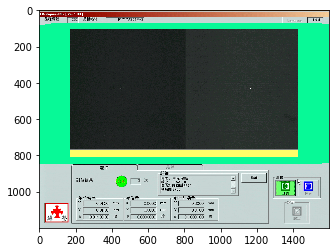

In [35]:
##########規定用[\\]當路徑##############
output_path='C:\\Users\\Jacky\\Desktop\\find_cut\\screen\\'
plt.imshow(image)
cv2.imwrite(output_path +'Target_'+'.jpg', image)
plt.show()
#顯示1717AS04

## 串流取像

Start....
w:1431
h:741


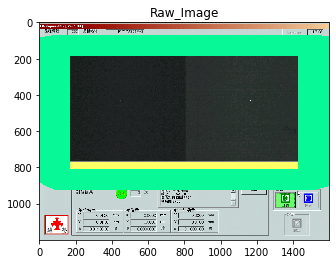

======file_two======


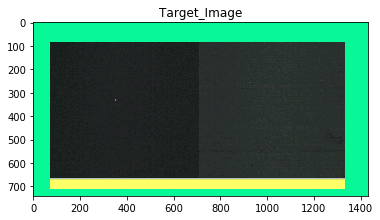

w:1093
h:331


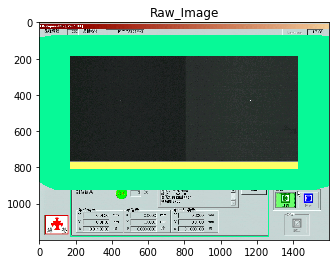

======file_one======


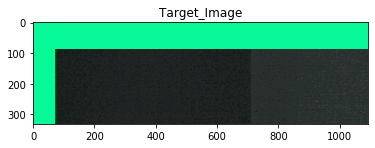

w:1431
h:741


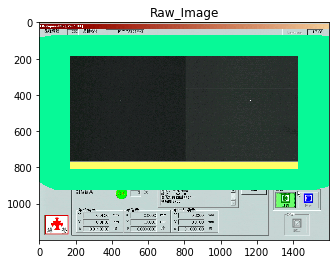

======file_two======


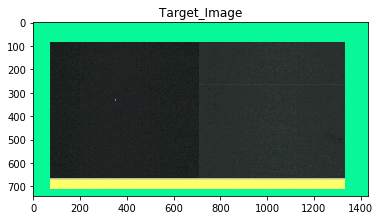

w:1093
h:331


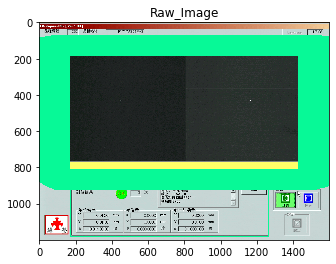

======file_one======


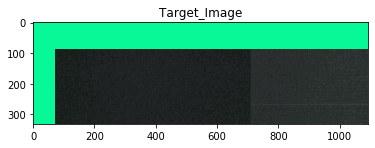

KeyboardInterrupt: 

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import datetime
start_time=time.time()
#cut frame，楨數
time_F =15 
value=0.6
#input_path   = './video/2021-05-20 08-56-30_7HAA.mp4'
#output_path  = './predict/'
#改成one、two分開

output_path= 'C:/Users/Jacky/Desktop/find_cut/20210609/'
Target= './template/'

#######################NEW##################################
output_path1='C:/Users/Jacky/Desktop/find_cut/screen/one/'
output_path2='C:/Users/Jacky/Desktop/find_cut/screen/two/'
#######################NEW##################################
# Read template folder

template_paths = []
image_paths=[]

if os.path.isdir(Target):

    for inp_file in os.listdir(Target):

        template_paths += [Target + inp_file]

else:

    template_paths += [Target]

template_paths = [inp_file for inp_file in template_paths if (inp_file[-4:] in ['.jpg', '.png', '.JPG','jpeg'])]

 


camera_port = 1
camera = cv2.VideoCapture(camera_port)
vc=cv2.VideoCapture(camera_port, cv2.CAP_DSHOW)

#調整解析度
vc.set(cv2.CAP_PROP_FRAME_WIDTH, 1600)
vc.set(cv2.CAP_PROP_FRAME_HEIGHT, 1200)
 

if vc.isOpened():#判斷是否開啟影片

    rval, video_frame = vc.read()

    print('Start....')

else:

    rval=False 

c=0

while rval:#擷取影像至結束

    rval,video_frame = vc.read()

    if(c % time_F == 0): #每隔幾幀進行擷取, 
        #######放置多個temp特徵#####
        temp_list=[]
        ###########################
        for temp in template_paths:
            ######new，使用多個temp####
            temp_list.append(temp)
            ##########################
            image = video_frame

            img_rgb = image

            img_gray = cv2. cvtColor (img_rgb, cv2. COLOR_BGR2GRAY)
            
            
            #讀取temp特徵
            template = cv2. imread(temp,0)

            w, h = template. shape[ ::-1 ]

            print('w:{}\nh:{}'.format(w,h))

            res = cv2. matchTemplate(img_gray ,template,cv2.TM_CCOEFF_NORMED)

            threshold = value

            loc = np.where(res >=threshold)

            if np.asarray(loc[0]).size!=0: #if have object,plt image；loc tuple transfer to array

                for pt in zip (* loc [ ::- 1 ]):

                    cv2. rectangle (img_rgb, pt, ( pt [ 0 ] + w, pt [ 1 ] + h ) , ( 7 , 249 , 151 ) , 2 )

                #設定截圖時左上角(x,y)座標
                x=99 #截圖左上角 x座標

                y=100  #截圖左上角 y座標

                plt.imshow (img_rgb)

                plt.title('Raw_Image')
                
#               cv2.imwrite(output_path +'Screen_'+name+'.jpg', img_rgb)

                plt.show()

                #cut object from raw image

                #初始點上面X,Y已經設定好了
                #修改截圖出來的長寬H、W

                crop_img = img_rgb[y:y+h,x:x+w]

                ss=datetime.datetime.now().strftime('%Y-%m-%d %H%M%S.%f')

                #cv2.imwrite(output_path +'Target_'+ss+'.jpg', crop_img)

                plt.title('Target_Image')
                #cv2.imwrite(output_path+'Target_'+ss+'.jpg',crop_img)
                #############new，不同template存不同資料夾################
                if temp == temp_list[0]:
                    print('======file_two======')
                    cv2.imwrite(output_path1+'Target_'+ss+'.jpg',crop_img)
                    
                elif temp == temp_list[1]:
                    print('======file_one======')
                    cv2.imwrite(output_path2+'Target_'+ss+'.jpg',crop_img)
                #############new，不同template存不同資料夾################
                plt.imshow(crop_img)

                plt.show()

            else:

                continue

    c=c+1       

end_time=time.time()

print('END')

print('Time:',end_time-start_time)
camera.release()

In [44]:
temp_list[0]

'./template/Target_1.jpg'

In [46]:
temp_list

['./template/Target_1.jpg', './template/Target_2.jpg']

In [45]:
temp

'./template/Target_2.jpg'

## 影像處理

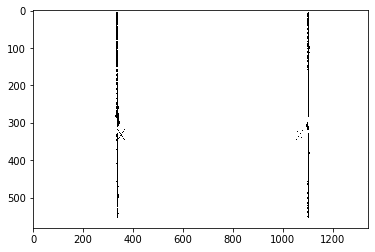

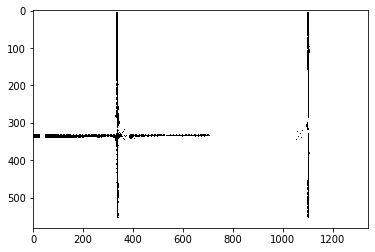

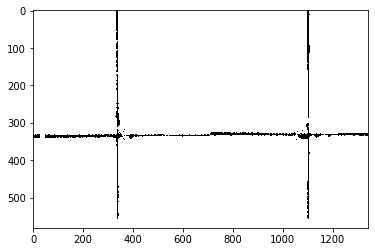

one 資料夾篩選結果 []


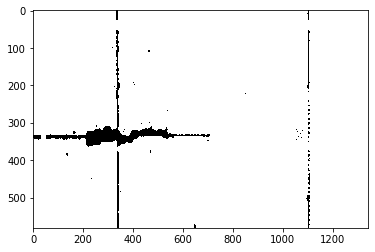

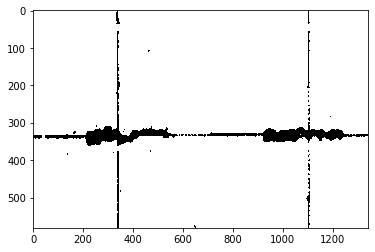

two 資料夾篩選結果 []
          0
sheet_id  0
point_1   0
point_2   0
point_3   0
point_4   0
point_5   0
point_6   0
point_7   0
point_8   0
check     0
=========real===========
         0
point_1  0
point_2  0
point_3  0
point_4  0
point_5  0
point_6  0
point_7  0
point_8  0


In [23]:
#載入寫好的外部程式，(名稱不能有'_'，要放同一個資料夾下)
import CuttingLine as CL
import time
#path='C:\\Users\\2102048\\pythonCV\\'
path='C:\\Users\\Jacky\\Desktop\\'
#過濾
CL.use_find_CuttingLine(path+'find_cut\\screen\\',path+'find_cut\\temp')
time.sleep(1)
#分邊
CL.precutting(path+'find_cut\\temp\\',path+'find_cut\\cuttemp\\')
time.sleep(1)
#計算
CL.x_ray_cutting(path+'find_cut\\cuttemp\\',path+'find_cut\\cutresult\\')

## 重建資料夾

In [11]:
#清空one、two 
import CuttingLine as CL
import time
#path='C:\\Users\\2102048\\pythonCV\\'
path='C:\\Users\\Jacky\\Desktop\\'
CL.resetfile(path+'find_cut\\screen\\one')
time.sleep(2)
CL.resetfile(path+'find_cut\\screen\\two')

In [ ]:
#載入寫好的外部程式，(名稱不能有'_'，要放同一個資料夾下)
import CuttingLine as CL
#過濾
CL.use_find_CuttingLine('C:\\Users\\Jacky\\Desktop\\find_cut\\Screen\\','C:\\Users\\Jacky\\Desktop\\find_cut\\temp')
time.sleep(1)
#分邊
CL.precutting('C:\\Users\\Jacky\\Desktop\\find_cut\\temp\\','C:\\Users\\Jacky\\Desktop\\find_cut\\cut_temp\\')
time.sleep(1)
# #計算
# CL.x_ray_cutting('C:\\Users\\Jacky\\Desktop\\find_cut\\cut_temp\\','C:\\Users\\Jacky\\Desktop\\find_cut\\cut_result\\')

In [5]:
video_frame.shape

(1200, 1600, 3)

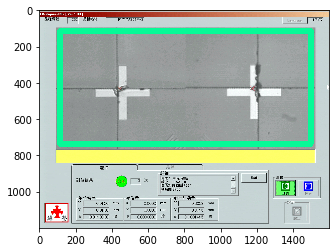

In [67]:
output_path='C:\\Users\\Jacky\\Desktop\\find_cut\\Screen\\'
plt.imshow(image)
cv2.imwrite(output_path +'Target_'+'.jpg', image)
plt.show()